In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition 2.csv")
df = df.set_index(np.arange(1,1471))

# Data Exploration

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Clearly Class Imbalance Probelm

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# See the correlation between variables

In [6]:
df_heatmap=df
print ("The Rule of thumb for r is:",2/np.sqrt(len(df_heatmap)))
def highlight_red(val):
    color = 'red' if 1 > np.abs(val) > 2/np.sqrt(len(df_heatmap)) else 'black'
    return 'color: %s' % color

# Generate the correlation matrix:
corr = df_heatmap.corr()
corr.style.applymap(highlight_red)

The Rule of thumb for r is: 0.052164053095730106


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,0.0106609,-0.00168612,0.208034,nan,-0.0101455,0.0101464,0.0242865,0.02982,0.509604,-0.00489188,0.497855,0.0280512,0.299635,0.00363358,0.0019039,0.0535347,nan,0.0375097,0.680381,-0.0196208,-0.02149,0.311309,0.212901,0.216513,0.202089
DailyRate,0.0106609,1,-0.00498534,-0.0168064,nan,-0.0509904,0.0183549,0.0233814,0.0461349,0.00296633,0.030571,0.00770706,-0.0321816,0.0381534,0.0227037,0.000473296,0.00784603,nan,0.0421428,0.0145147,0.00245254,-0.0378481,-0.0340548,0.00993201,-0.033229,-0.0263632
DistanceFromHome,-0.00168612,-0.00498534,1,0.0210418,nan,0.0329164,-0.0160753,0.0311306,0.00878328,0.00530273,-0.00366884,-0.0170144,0.0274729,-0.0292508,0.0402354,0.0271096,0.00655747,nan,0.044872,0.00462843,-0.0369422,-0.026556,0.00950772,0.018845,0.0100288,0.014406
Education,0.208034,-0.0168064,0.0210418,1,nan,0.0420701,-0.0271283,0.0167748,0.0424376,0.101589,-0.0112961,0.0949607,-0.0260842,0.126317,-0.0111109,-0.0245388,-0.00911838,nan,0.0184222,0.14828,-0.0251002,0.00981919,0.0691137,0.0602356,0.0542543,0.0690654
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.0101455,-0.0509904,0.0329164,0.0420701,nan,1,0.0176208,0.0351792,-0.00688792,-0.0185192,-0.0462467,-0.0148285,0.0126482,-0.00125103,-0.012944,-0.0203588,-0.0698614,nan,0.0622267,-0.0143652,0.0236032,0.0103086,-0.0112405,-0.00841631,-0.00901906,-0.00919665
EnvironmentSatisfaction,0.0101464,0.0183549,-0.0160753,-0.0271283,nan,0.0176208,1,-0.049857,-0.0082776,0.0012117,-0.00678435,-0.00625909,0.0375996,0.0125943,-0.0317012,-0.029548,0.00766538,nan,0.00343216,-0.00269307,-0.0193593,0.0276273,0.00145755,0.0180075,0.0161936,-0.00499872
HourlyRate,0.0242865,0.0233814,0.0311306,0.0167748,nan,0.0351792,-0.049857,1,0.0428606,-0.0278535,-0.0713346,-0.0157943,-0.0152967,0.0221569,-0.00906199,-0.0021717,0.00133045,nan,0.0502634,-0.00233368,-0.00854769,-0.00460723,-0.0195816,-0.0241062,-0.0267156,-0.0201232
JobInvolvement,0.02982,0.0461349,0.00878328,0.0424376,nan,-0.00688792,-0.0082776,0.0428606,1,-0.0126299,-0.0214759,-0.0152715,-0.0163221,0.0150124,-0.0172046,-0.0290713,0.0342968,nan,0.0215226,-0.00553318,-0.0153378,-0.0146166,-0.0213554,0.00871696,-0.0241843,0.0259758
JobLevel,0.509604,0.00296633,0.00530273,0.101589,nan,-0.0185192,0.0012117,-0.0278535,-0.0126299,1,-0.00194371,0.9503,0.039563,0.142501,-0.0347305,-0.0212221,0.0216415,nan,0.0139839,0.782208,-0.0181906,0.0378177,0.534739,0.389447,0.353885,0.375281


# Plots

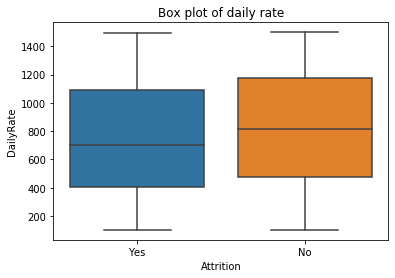

In [7]:
plt.title('Box plot of daily rate')
plt.axis
ax = sns.boxplot(x="Attrition", y="DailyRate", data=df)

# Data preprocessing

In [8]:
# Check info on raw data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Data does not have any missing data

In [9]:
# Create dummies for "string" attributes, concat them, and drop the original "string" attributes
def obj_columns_to_dummies(df):
    changed_list = []
    print("Dummies Created from Columns: \n")
    for n in range(2, df.shape[1]):
        if df.iloc[:,n].dtypes == "O":
            print(df.iloc[:,n].name)
            temp_dummies_dataframe = pd.get_dummies(df.iloc[:,n])
            df = pd.concat([df, temp_dummies_dataframe], axis = 1, sort = True)
            changed_list.append(df.iloc[:,n].name)

    return(df.drop(columns = changed_list))

In [10]:
df = obj_columns_to_dummies(df)

Dummies Created from Columns: 

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [11]:
# Change the dependent varaible ("Attrition") data from string to 0/1
for i in range(df.shape[0]):
    if df.iloc[i,1] == "Yes":
        df.iloc[i,1] = 1
    else:
        df.iloc[i,1] = 0

In [12]:
# Columns created by get_dummies function are uint8, which is not the appropriate data type for skl decision tree model
# Change datatype uint8 to int
def non_int_to_int(df):
    for n in range(df.shape[1]):
        if df.iloc[:,n].dtypes != "int64":
            df.iloc[:,n] = df.iloc[:,n].astype("int")
    return (df)

In [13]:
df = non_int_to_int(df)

In [14]:
# Normalize value
column_norm = ["DailyRate","HourlyRate","MonthlyIncome","MonthlyRate","DistanceFromHome",]
for x in column_norm:
    minmax_scaler = preprocessing.MinMaxScaler().fit(df[[x]])
    df[ x + '_norm']=minmax_scaler.transform(df[[x]])

In [15]:
df.to_csv("Pre-Processed Data.csv", index = False)

In [16]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,Married,Single,Y,No,Yes,DailyRate_norm,HourlyRate_norm,MonthlyIncome_norm,MonthlyRate_norm,DistanceFromHome_norm
1,41,1,1102,1,2,1,1,2,94,3,...,0,1,1,0,1,0.715820,0.914286,0.262454,0.698053,0.000000
2,49,0,279,8,1,1,2,3,61,2,...,1,0,1,1,0,0.126700,0.442857,0.217009,0.916001,0.250000
3,37,1,1373,2,2,1,4,4,92,2,...,0,1,1,0,1,0.909807,0.885714,0.056925,0.012126,0.035714
4,33,0,1392,3,4,1,5,4,56,3,...,1,0,1,0,1,0.923407,0.371429,0.100053,0.845814,0.071429
5,27,0,591,2,1,1,7,1,40,3,...,1,0,1,1,0,0.350036,0.142857,0.129489,0.583738,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36,0,884,23,2,1,2061,3,41,4,...,1,0,1,1,0,0.559771,0.157143,0.082254,0.409396,0.785714
1467,39,0,613,6,1,1,2062,4,42,2,...,1,0,1,1,0,0.365784,0.171429,0.472986,0.777474,0.178571
1468,27,0,155,4,3,1,2064,2,87,4,...,1,0,1,0,1,0.037938,0.814286,0.270300,0.123670,0.107143
1469,49,0,1023,2,3,1,2065,4,63,2,...,1,0,1,1,0,0.659270,0.471429,0.230700,0.447661,0.035714
